In [1]:
#importing all required librabries

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
#read the csv file into a dataframe
file = pd.read_csv('datascience1.csv',nrows = 151000)
file.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique_ID,Timestamp,Flow Duration,Tot upstream Pkts,Tot downstream Pkts,TotLen upstream Pkts,TotLen downstream Pkts,upstream Pkt Len Max,upstream Pkt Len Min,downstream currentrt,...,Init upstream Win Byts,Init downstream Win Byts,upstream Act Data Pkts,upstream Seg Size Min,Active Mean,Active Std,downstream_relcap,Active Min,Idle Std,Date
0,192.168.4.118-203.73.24.75-4504-80-6,6/7/2020 17:51,3974862,29,44,86,59811,86,0,2.965517,...,-1,5840,1,0,0.0,0.0,58.0,0,0.0,20200607
1,192.168.4.118-203.73.24.75-4504-80-6,6/7/2020 7:19,63,1,1,0,0,0,0,0.000000,...,-1,17520,0,0,0.0,0.0,58.0,0,0.0,20200607
2,192.168.4.118-203.73.24.75-4504-80-6,6/7/2020 0:17,476078,2,6,86,3037,86,0,43.000000,...,-1,5840,1,0,0.0,0.0,59.0,0,0.0,20200607
3,192.168.4.118-203.73.24.75-4505-80-6,6/7/2020 17:39,151,2,1,0,0,0,0,0.000000,...,-1,17520,0,0,0.0,0.0,93.0,0,0.0,20200607
4,192.168.4.118-203.73.24.75-4505-80-6,6/7/2020 8:53,472507,2,5,73,1050,73,0,36.500000,...,-1,5840,1,0,0.0,0.0,93.0,0,0.0,20200607
5,192.168.4.118-203.73.24.75-4506-80-6,6/7/2020 17:34,138,1,1,0,0,0,0,0.000000,...,-1,16470,0,0,0.0,0.0,81.0,0,0.0,20200607
6,192.168.4.118-203.73.24.75-4506-80-6,6/7/2020 8:49,469596,2,5,69,890,69,0,34.500000,...,-1,5840,1,0,0.0,0.0,81.0,0,0.0,20200607
7,192.168.4.118-203.73.24.75-4507-80-6,6/7/2020 17:10,1978,1,1,0,0,0,0,0.000000,...,-1,16630,0,0,0.0,0.0,66.0,0,0.0,20200607
8,192.168.4.118-203.73.24.75-4507-80-6,6/7/2020 8:32,468629,2,5,70,669,70,0,35.000000,...,-1,5840,1,0,0.0,0.0,65.0,0,0.0,20200607
9,192.168.4.118-203.73.24.75-4508-80-6,6/7/2020 17:11,102,1,1,0,0,0,0,0.000000,...,-1,16851,0,0,0.0,0.0,81.0,0,0.0,20200607


In [3]:
#converted the time object into str and applied datetime library to convert the 24 hrs time to 12 hours with am and pm column
file['Timestamp'] = pd.to_datetime(file['Timestamp']).apply(lambda x:(x.strftime('%Y-%m-%d %H:%M:%S')))
file['Timestamp'] = file['Timestamp'].astype(str)
file['am,pm'] = file['Timestamp'].apply(lambda x:'am' if int((datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H'))) < 12 else 'pm')

In [4]:
# grouped the data with unique_ID, date and am_pm column to get only one row for am and pm on each day
file = file.groupby(['Unique_ID','Date','am,pm']).mean()

In [5]:
file.head(10)

Flow Duration  \
Unique_ID                         Date     am,pm                  
192.168.1.101-74.55.1.4-1026-80-6 20200607 am             239.0   
                                           pm          904736.0   
                                  20200608 am          578657.0   
                                           pm          568862.5   
                                  20200609 am        83326558.0   
                                           pm        41937221.0   
                                  20200610 am          487135.0   
                                           pm          255260.5   
                                  20200611 am        11941057.0   
                                           pm        11941466.5   

                                                  Tot upstream Pkts  \
Unique_ID                         Date     am,pm                      
192.168.1.101-74.55.1.4-1026-80-6 20200607 am                   2.0   
                                           pm                   2.0   
                                  20200608 am                   1.5   
                                           pm                   1.5   
                                  20200609 am                   1.0   
                                           pm                  38.5   
                                  20200610 am                   2.0   
                                           pm                   2.0   
                                  20200611 am                   3.0   
                                           pm                   3.0   

                                                  Tot downstream Pkts  \
Unique_ID                         Date     am,pm                        
192.168.1.101-74.55.1.4-1026-80-6 20200607 am                     1.0   
                                           pm                     6.0   
                                  20200608 am                     3.0   
                                           pm                     3.0   
                                  20200609 am                     1.0   
                                           pm                    63.0   
                                  20200610 am                     5.0   
                                           pm                     3.5   
                                  20200611 am                     5.0   
                                           pm                     5.0   

                                                  TotLen upstream Pkts  \
Unique_ID                         Date     am,pm                         
192.168.1.101-74.55.1.4-1026-80-6 20200607 am                      0.0   
                                           pm                    115.0   
                                  20200608 am                     49.5   
                                           pm                     36.5   
                                  20200609 am                      0.0   
                                           pm                    475.5   
                                  20200610 am                     92.0   
                                           pm                     57.5   
                                  20200611 am                    408.0   
                                           pm                    405.5   

                                                  TotLen downstream Pkts  \
Unique_ID                         Date     am,pm                           
192.168.1.101-74.55.1.4-1026-80-6 20200607 am                        0.0   
                                           pm                     2417.0   
                                  20200608 am                      300.0   
                                           pm                      525.0   
                                  20200609 am                        0.0   
                                           pm                    77303.5   
                  

In [6]:
file = file.reset_index()

In [7]:
file.fillna(0)

,Unique_ID,Date,"am,pm",Flow Duration,Tot upstream Pkts,Tot downstream Pkts,TotLen upstream Pkts,TotLen downstream Pkts,upstream Pkt Len Max,upstream Pkt Len Min,...,downstream Byts/b Avg,Init upstream Win Byts,Init downstream Win Byts,upstream Act Data Pkts,upstream Seg Size Min,Active Mean,Active Std,downstream_relcap,Active Min,Idle Std
0,192.168.1.101-74.55.1.4-1026-80-6,20200607,am,239.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,64240.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00
1,192.168.1.101-74.55.1.4-1026-80-6,20200607,pm,904736.0,2.0,6.0,115.0,2417.0,115.0,0.0,...,0.0,-1.0,5840.0,1.0,0.0,0.0,0.000,0.0,0.0,0.00
2,192.168.1.101-74.55.1.4-1026-80-6,20200608,am,578657.0,1.5,3.0,49.5,300.0,49.5,0.0,...,0.0,-1.0,34515.0,0.5,0.0,0.0,0.000,0.0,0.0,0.00
3,192.168.1.101-74.55.1.4-1026-80-6,20200608,pm,568862.5,1.5,3.0,36.5,525.0,36.5,0.0,...,0.0,-1.0,34745.0,0.5,0.0,0.0,0.000,0.0,0.0,0.00
4,192.168.1.101-74.55.1.4-1026-80-6,20200609,am,83326558.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,62898.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131582,192.168.56.102-97.74.144.108-9969-80-6,20200615,pm,107043759.0,13.0,4.0,2530.0,0.0,230.0,0.0,...,0.0,-1.0,0.0,11.0,0.0,5509948.0,1663390.921,0.0,4333753.0,20584008.65
131583,192.168.56.102-97.74.144.108-9969-80-6,20200617,am,14615.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,32738.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00
131584,192.168.56.102-97.74.144.108-9969-80-6,20200617,pm,15492.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,32738.0,0.0,0.0,0.0,0.000,0.0,0.0,0.00
131585,192.168.56.102-97.74.144.108-9969-80-6,20200618,am,12851.0,2.0,5.0,266.0,935.0,266.0,0.0,...,0.0,-1.0,219.0,1.0,0.0,0.0,0.000,0.0,0.0,0.00


In [8]:
#read the cancelled dispatch details into dataframe and removed the duplicates
cancel_dispatch = pd.read_csv('dispatch.csv')
print(cancel_dispatch.head(10))
print(cancel_dispatch.shape)
cancel_dispatch = cancel_dispatch.drop_duplicates(subset = ['Unique_ID','dispatch_date'], keep = 'first')
print(cancel_dispatch.shape)

                                 Unique_ID  dispatch_date
0   192.168.56.102-97.74.144.108-5704-80-6       20200611
1     192.168.2.109-203.73.24.75-4754-80-6       20200611
2     192.168.2.109-203.73.24.75-4754-80-6       20200611
3     192.168.2.109-203.73.24.75-4754-80-6       20200611
4     192.168.2.109-203.73.24.75-4754-80-6       20200611
5  192.168.56.1-208.113.162.153-58849-80-6       20200611
6    192.168.56.1-67.220.214.50-37261-80-6       20200611
7    192.168.56.1-67.220.214.50-37261-80-6       20200611
8     192.168.3.114-203.73.24.75-3513-80-6       20200611
9    192.168.2.110-67.220.214.50-4950-80-6       20200611
(796, 2)
(506, 2)


In [9]:
#converted the unique_ID into the list. Unique_ID column tells about different unique modem provided by the service provider to the customers
cancel_list = cancel_dispatch['Unique_ID'].unique().tolist()

In [10]:
#target column has been created with the labels 1 and 0, label 1 implements that the dispatch has been cancelled and label 0 implements that the dispatch happened.
file['target_column'] = file['Unique_ID'].apply(lambda x:1 if x in cancel_list else 0 )

In [11]:
# merged the features dataset and cancelled dispatch dataset to split the train dataset and test dataset
final = pd.merge(file,cancel_dispatch, on = ['Unique_ID'], how = 'left')


In [12]:
final = final.fillna(0)
final.head(5)

,Unique_ID,Date,"am,pm",Flow Duration,Tot upstream Pkts,Tot downstream Pkts,TotLen upstream Pkts,TotLen downstream Pkts,upstream Pkt Len Max,upstream Pkt Len Min,...,Init downstream Win Byts,upstream Act Data Pkts,upstream Seg Size Min,Active Mean,Active Std,downstream_relcap,Active Min,Idle Std,target_column,dispatch_date
0,192.168.1.101-74.55.1.4-1026-80-6,20200607,am,239.0,2.0,1.0,0.0,0.0,0.0,0.0,...,64240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,192.168.1.101-74.55.1.4-1026-80-6,20200607,pm,904736.0,2.0,6.0,115.0,2417.0,115.0,0.0,...,5840.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,192.168.1.101-74.55.1.4-1026-80-6,20200608,am,578657.0,1.5,3.0,49.5,300.0,49.5,0.0,...,34515.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,192.168.1.101-74.55.1.4-1026-80-6,20200608,pm,568862.5,1.5,3.0,36.5,525.0,36.5,0.0,...,34745.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
4,192.168.1.101-74.55.1.4-1026-80-6,20200609,am,83326558.0,1.0,1.0,0.0,0.0,0.0,0.0,...,62898.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


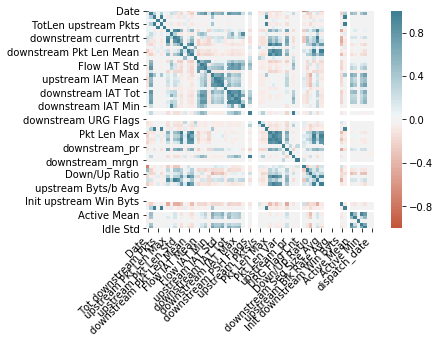

In [13]:
#correlation matrix has been found to now how each feature is correlated with other features
corr = final.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [14]:
data1 = final[final['Unique_ID'].isin(cancel_list)]
train = data1[data1['Date'] < data1['dispatch_date']]
test = data1[data1['Date'] >= data1['dispatch_date']]

In [15]:
remain = final[~(final['Unique_ID'].isin(cancel_list))]
remain_list = remain['Unique_ID'].unique().tolist()
print(len(remain_list))


6006


In [16]:
remain_list1 = remain_list[0:4500]
remain_list2 = remain_list[4500:6006]
remain_data = remain[remain['Unique_ID'].isin(remain_list1)]
remain_data1 = remain[remain['Unique_ID'].isin(remain_list2)]

In [17]:
train_data = pd.concat([train,remain_data])
test_data = pd.concat([test,remain_data1])

In [18]:
train_data['target_column'].nunique()

2

In [19]:
train_data.columns

Index(['Unique_ID', 'Date', 'am,pm', 'Flow Duration', 'Tot upstream Pkts',
       'Tot downstream Pkts', 'TotLen upstream Pkts', 'TotLen downstream Pkts',
       'upstream Pkt Len Max', 'upstream Pkt Len Min', 'downstream currentrt',
       'upstream Pkt Len Std', 'downstream Pkt Len Max',
       'downstream Pkt Len Min', 'downstream Pkt Len Mean',
       'downstream Pkt Len Std', 'Flow Byts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'upstream IAT Tot',
       'upstream IAT Mean', 'upstream IAT Std', 'upstream IAT Max',
       'upstream IAT Min', 'downstream IAT Tot', 'downstream IAT Mean',
       'downstream IAT Std', 'downstream IAT Max', 'downstream IAT Min',
       'upstream PSH Flags', 'downstream PSH Flags', 'upstream URG Flags',
       'downstream URG Flags', 'upstream Pkts/s', 'downstream Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'downstream_pr', 'SYN Flag Cnt', 'upstream_pr',
       'PSH 

In [20]:
train_data = train_data.drop(columns = ['Date','am,pm','dispatch_date'])
train_data.columns

Index(['Unique_ID', 'Flow Duration', 'Tot upstream Pkts',
       'Tot downstream Pkts', 'TotLen upstream Pkts', 'TotLen downstream Pkts',
       'upstream Pkt Len Max', 'upstream Pkt Len Min', 'downstream currentrt',
       'upstream Pkt Len Std', 'downstream Pkt Len Max',
       'downstream Pkt Len Min', 'downstream Pkt Len Mean',
       'downstream Pkt Len Std', 'Flow Byts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'upstream IAT Tot',
       'upstream IAT Mean', 'upstream IAT Std', 'upstream IAT Max',
       'upstream IAT Min', 'downstream IAT Tot', 'downstream IAT Mean',
       'downstream IAT Std', 'downstream IAT Max', 'downstream IAT Min',
       'upstream PSH Flags', 'downstream PSH Flags', 'upstream URG Flags',
       'downstream URG Flags', 'upstream Pkts/s', 'downstream Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'downstream_pr', 'SYN Flag Cnt', 'upstream_pr',
       'PSH Flag Cnt', 'downs

In [21]:
test_data = test_data.drop(columns = ['Date','am,pm','dispatch_date'])
test_data.columns

Index(['Unique_ID', 'Flow Duration', 'Tot upstream Pkts',
       'Tot downstream Pkts', 'TotLen upstream Pkts', 'TotLen downstream Pkts',
       'upstream Pkt Len Max', 'upstream Pkt Len Min', 'downstream currentrt',
       'upstream Pkt Len Std', 'downstream Pkt Len Max',
       'downstream Pkt Len Min', 'downstream Pkt Len Mean',
       'downstream Pkt Len Std', 'Flow Byts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'upstream IAT Tot',
       'upstream IAT Mean', 'upstream IAT Std', 'upstream IAT Max',
       'upstream IAT Min', 'downstream IAT Tot', 'downstream IAT Mean',
       'downstream IAT Std', 'downstream IAT Max', 'downstream IAT Min',
       'upstream PSH Flags', 'downstream PSH Flags', 'upstream URG Flags',
       'downstream URG Flags', 'upstream Pkts/s', 'downstream Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'downstream_pr', 'SYN Flag Cnt', 'upstream_pr',
       'PSH Flag Cnt', 'downs

In [22]:
label = LabelEncoder()
train_data['Unique_ID'] = label.fit_transform(train_data['Unique_ID'])

In [23]:
train_data['target_column'].unique()

array([1, 0], dtype=int64)

In [24]:
X_train = train_data.iloc[:,1:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,1:-1]
y_test = test_data.iloc[:,-1]

In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

In [26]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [30]:
X_train.shape

(98316, 64)

In [34]:
model = Sequential()
model.add(Dense(20, input_shape = (64,), activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
model.fit(X_train,y_train, batch_size = 10, epochs = 200)

Epoch 1/200
98316/98316 [==============================] - 12s 125us/step - loss: 0.2349 - accuracy: 0.9329
Epoch 2/200
98316/98316 [==============================] - 18s 186us/step - loss: 0.2349 - accuracy: 0.9329
Epoch 3/200
98316/98316 [==============================] - 14s 145us/step - loss: 0.2349 - accuracy: 0.9329
Epoch 4/200
98316/98316 [==============================] - 14s 141us/step - loss: 0.2353 - accuracy: 0.9328
Epoch 5/200
98316/98316 [==============================] - 14s 140us/step - loss: 0.2351 - accuracy: 0.9328
Epoch 6/200
98316/98316 [==============================] - 14s 141us/step - loss: 0.2347 - accuracy: 0.9329
Epoch 7/200
98316/98316 [==============================] - 12s 125us/step - loss: 0.2348 - accuracy: 0.9329
Epoch 8/200
98316/98316 [==============================] - 12s 118us/step - loss: 0.2345 - accuracy: 0.9328s - loss: 0.2326 -  - ETA: 0s - loss: 0.2339 - accuracy
Epoch 9/200
98316/98316 [==============================] - 12s 120us/step - loss:

98316/98316 [==============================] - 11s 117us/step - loss: 0.2340 - accuracy: 0.9333
Epoch 76/200
98316/98316 [==============================] - 12s 117us/step - loss: 0.2344 - accuracy: 0.9334
Epoch 77/200
98316/98316 [==============================] - 12s 117us/step - loss: 0.2344 - accuracy: 0.9334
Epoch 78/200
98316/98316 [==============================] - ETA: 0s - loss: 0.2347 - accuracy: 0.93 - 12s 117us/step - loss: 0.2347 - accuracy: 0.9334
Epoch 79/200
98316/98316 [==============================] - 11s 116us/step - loss: 0.2348 - accuracy: 0.9333
Epoch 80/200
98316/98316 [==============================] - 12s 119us/step - loss: 0.2343 - accuracy: 0.9333
Epoch 81/200
98316/98316 [==============================] - 12s 125us/step - loss: 0.2343 - accuracy: 0.9334
Epoch 82/200
98316/98316 [==============================] - 12s 119us/step - loss: 0.2347 - accuracy: 0.9334
Epoch 83/200
98316/98316 [==============================] - 12s 125us/step - loss: 0.2345 - accurac

98316/98316 [==============================] - 12s 121us/step - loss: 0.2358 - accuracy: 0.9333
Epoch 150/200
98316/98316 [==============================] - 12s 121us/step - loss: 0.2368 - accuracy: 0.9333
Epoch 151/200
98316/98316 [==============================] - 12s 126us/step - loss: 0.2361 - accuracy: 0.9334
Epoch 152/200
98316/98316 [==============================] - 13s 130us/step - loss: 0.2356 - accuracy: 0.9334
Epoch 153/200
98316/98316 [==============================] - 13s 130us/step - loss: 0.2365 - accuracy: 0.9333
Epoch 154/200
98316/98316 [==============================] - 13s 131us/step - loss: 0.2360 - accuracy: 0.9334
Epoch 155/200
98316/98316 [==============================] - 13s 127us/step - loss: 0.2360 - accuracy: 0.9334
Epoch 156/200
98316/98316 [==============================] - 12s 120us/step - loss: 0.2363 - accuracy: 0.9333s - loss:
Epoch 157/200
98316/98316 [==============================] - 12s 120us/step - loss: 0.2366 - accuracy: 0.9333
Epoch 158/200
9

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 1,478
Trainable params: 1,478
Non-trainable params: 0
_________________________________________________________________


In [61]:
y_pred = model.predict_classes(X_test)
y_val = model.predict_classes(X_train)

In [62]:
def train_performanance(y_val,Y_train):
    print("Accuracy: ",accuracy_score(y_val,Y_train))
    print("Precision:", precision_score(y_val,Y_train))
    print("Recall:", recall_score(y_val,Y_train))
    print("F1:", f1_score(y_val,Y_train))

In [63]:
def test_performanance(y_pred,Y_test):
    print("Accuracy: ",accuracy_score(y_pred,Y_test))
    print("Precision:", precision_score(y_pred,Y_test))
    print("Recall:", recall_score(y_pred,Y_test))
    print("F1:", f1_score(y_pred,Y_test))

In [64]:
train_performanance(y_val,y_train)

Accuracy:  0.9340697343260507
Precision: 0.03511655708308428
Recall: 0.9038461538461539
F1: 0.06760644418872268


In [65]:
test_performanance(y_pred,y_test)

Accuracy:  0.8683815963545495
Precision: 0.000273972602739726
Recall: 0.0012062726176115801
F1: 0.0004465282429113641


In [50]:
model1 = Sequential()
model1.add(Dense(20, input_shape = (64,), activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='relu'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model1.fit(X_train,y_train, epochs = 600)

Epoch 1/600
98316/98316 [==============================] - 8s 80us/step - loss: 0.3385 - accuracy: 0.9318
Epoch 2/600
98316/98316 [==============================] - 8s 77us/step - loss: 0.2942 - accuracy: 0.9319
Epoch 3/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2776 - accuracy: 0.9319
Epoch 4/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2661 - accuracy: 0.9319
Epoch 5/600
98316/98316 [==============================] - 8s 82us/step - loss: 0.2648 - accuracy: 0.9319
Epoch 6/600
98316/98316 [==============================] - 8s 81us/step - loss: 0.2601 - accuracy: 0.9319
Epoch 7/600
98316/98316 [==============================] - 8s 82us/step - loss: 0.2583 - accuracy: 0.9319
Epoch 8/600
98316/98316 [==============================] - 9s 91us/step - loss: 0.2516 - accuracy: 0.9319
Epoch 9/600
98316/98316 [==============================] - 9s 87us/step - loss: 0.2499 - accuracy: 0.9319
Epoch 10/600
98316/98316 [====================

98316/98316 [==============================] - 7s 75us/step - loss: 0.2468 - accuracy: 0.9321
Epoch 78/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2462 - accuracy: 0.9321
Epoch 79/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2459 - accuracy: 0.9321
Epoch 80/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2464 - accuracy: 0.9320
Epoch 81/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2456 - accuracy: 0.9320
Epoch 82/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2457 - accuracy: 0.9321
Epoch 83/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2462 - accuracy: 0.9320
Epoch 84/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2456 - accuracy: 0.9321
Epoch 85/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2488 - accuracy: 0.9320
Epoch 86/600
98316/98316 [========================

98316/98316 [==============================] - 8s 84us/step - loss: 0.2513 - accuracy: 0.9321
Epoch 154/600
98316/98316 [==============================] - 7s 74us/step - loss: 0.2600 - accuracy: 0.9321
Epoch 155/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2602 - accuracy: 0.9321
Epoch 156/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2663 - accuracy: 0.9320
Epoch 157/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.2504 - accuracy: 0.9321
Epoch 158/600
98316/98316 [==============================] - 8s 85us/step - loss: 0.2507 - accuracy: 0.9321
Epoch 159/600
98316/98316 [==============================] - 8s 85us/step - loss: 0.2516 - accuracy: 0.9320
Epoch 160/600
98316/98316 [==============================] - 8s 81us/step - loss: 0.2528 - accuracy: 0.9321
Epoch 161/600
98316/98316 [==============================] - 8s 76us/step - loss: 0.2643 - accuracy: 0.9321
Epoch 162/600
98316/98316 [===============

Epoch 229/600
98316/98316 [==============================] - 8s 85us/step - loss: 0.2622 - accuracy: 0.9322
Epoch 230/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2687 - accuracy: 0.9321
Epoch 231/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2648 - accuracy: 0.9321
Epoch 232/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2653 - accuracy: 0.9321
Epoch 233/600
98316/98316 [==============================] - 8s 82us/step - loss: 0.2651 - accuracy: 0.9322
Epoch 234/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2667 - accuracy: 0.9321
Epoch 235/600
98316/98316 [==============================] - 8s 82us/step - loss: 0.2681 - accuracy: 0.9322
Epoch 236/600
98316/98316 [==============================] - 8s 80us/step - loss: 0.2656 - accuracy: 0.9321
Epoch 237/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.2666 - accuracy: 0.9322
Epoch 238/600
98316/98316 [=

98316/98316 [==============================] - 8s 83us/step - loss: 0.3174 - accuracy: 0.9321
Epoch 305/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3170 - accuracy: 0.9321
Epoch 306/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3214 - accuracy: 0.9321
Epoch 307/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3203 - accuracy: 0.9321
Epoch 308/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3241 - accuracy: 0.9321
Epoch 309/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3181 - accuracy: 0.9322
Epoch 310/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3191 - accuracy: 0.9322
Epoch 311/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3198 - accuracy: 0.9320
Epoch 312/600
98316/98316 [==============================] - 8s 82us/step - loss: 0.3214 - accuracy: 0.9320
Epoch 313/600
98316/98316 [===============

98316/98316 [==============================] - 8s 84us/step - loss: 0.3242 - accuracy: 0.9323
Epoch 380/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3245 - accuracy: 0.9323
Epoch 381/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3287 - accuracy: 0.9322
Epoch 382/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3267 - accuracy: 0.9322
Epoch 383/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3268 - accuracy: 0.9323
Epoch 384/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3234 - accuracy: 0.9323
Epoch 385/600
98316/98316 [==============================] - 8s 84us/step - loss: 0.3245 - accuracy: 0.9323
Epoch 386/600
98316/98316 [==============================] - 9s 87us/step - loss: 0.3252 - accuracy: 0.9324
Epoch 387/600
98316/98316 [==============================] - 7s 76us/step - loss: 0.3265 - accuracy: 0.9322
Epoch 388/600
98316/98316 [===============

98316/98316 [==============================] - 6s 56us/step - loss: 0.3324 - accuracy: 0.9322
Epoch 455/600
98316/98316 [==============================] - 5s 55us/step - loss: 0.3362 - accuracy: 0.9321
Epoch 456/600
98316/98316 [==============================] - 6s 57us/step - loss: 0.3412 - accuracy: 0.9316
Epoch 457/600
98316/98316 [==============================] - 5s 55us/step - loss: 0.3309 - accuracy: 0.9322
Epoch 458/600
98316/98316 [==============================] - 6s 59us/step - loss: 0.3326 - accuracy: 0.9322
Epoch 459/600
98316/98316 [==============================] - 5s 52us/step - loss: 0.3296 - accuracy: 0.9322
Epoch 460/600
98316/98316 [==============================] - 5s 51us/step - loss: 0.3297 - accuracy: 0.9323
Epoch 461/600
98316/98316 [==============================] - 5s 50us/step - loss: 0.3294 - accuracy: 0.9321
Epoch 462/600
98316/98316 [==============================] - 5s 51us/step - loss: 0.3293 - accuracy: 0.9322
Epoch 463/600
98316/98316 [===============

Epoch 530/600
98316/98316 [==============================] - 6s 66us/step - loss: 0.3358 - accuracy: 0.9320
Epoch 531/600
98316/98316 [==============================] - 7s 75us/step - loss: 0.3331 - accuracy: 0.9320
Epoch 532/600
98316/98316 [==============================] - 7s 67us/step - loss: 0.3342 - accuracy: 0.9321
Epoch 533/600
98316/98316 [==============================] - 7s 68us/step - loss: 0.3396 - accuracy: 0.9320
Epoch 534/600
98316/98316 [==============================] - 7s 68us/step - loss: 0.3391 - accuracy: 0.9321
Epoch 535/600
98316/98316 [==============================] - 8s 77us/step - loss: 0.3409 - accuracy: 0.9320
Epoch 536/600
98316/98316 [==============================] - 8s 83us/step - loss: 0.3399 - accuracy: 0.9319
Epoch 537/600
98316/98316 [==============================] - 6s 64us/step - loss: 0.3405 - accuracy: 0.9320
Epoch 538/600
98316/98316 [==============================] - 6s 56us/step - loss: 0.3399 - accuracy: 0.9319
Epoch 539/600
98316/98316 [=

In [54]:
y_pred = model1.predict_classes(X_test)
y_val = model1.predict_classes(X_train)

In [55]:
train_performanance(y_val,y_train)

Accuracy:  0.9330220920297815
Precision: 0.01778242677824268
Recall: 0.9083969465648855
F1: 0.03488201670819288


In [56]:
test_performanance(y_pred,y_test)

Accuracy:  0.8724974276054682
Precision: 0.000273972602739726
Recall: 0.001451378809869376
F1: 0.0004609356994699239


In [66]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred) 
confusion_matrix

array([[29537,   828],
       [ 3649,     1]], dtype=int64)

In [60]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 20)                1300      
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 1,434
Trainable params: 1,434
Non-trainable params: 0
_________________________________________________________________
